# Лабораторная работа 2. Линейная регрессия и регуляризация.

In [2]:
!pip install googledrivedownloader

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from tabulate import tabulate

from google_drive_downloader import GoogleDriveDownloader as gdd

## Задание 1

1. Для следующих данных постройте модель эстиматора с помощью полиномиальной регрессии. 
2. Подберите оптимальную степень полиномиальных базисных функций избегая переобучения.
3. Визуализируйте процесс переобучения графически и с помощью подсчётов ошибки на обучающей выборке.

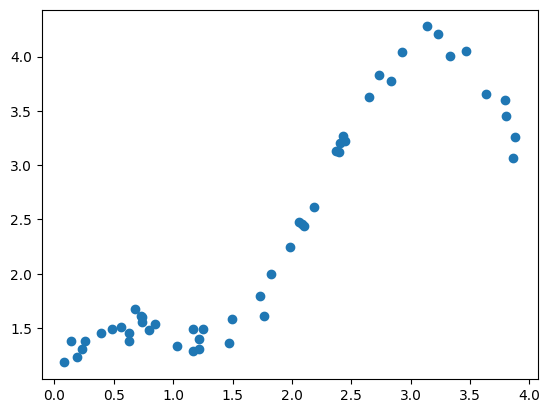

In [4]:
rng = np.random.RandomState(42)
x = 4 * rng.rand(50)
y = np.sin(x) + np.cos(2*x) + x + 0.1 * rng.randn(50)
plt.scatter(x, y);

In [5]:
poly_model = make_pipeline(PolynomialFeatures(5), LinearRegression())

In [6]:
poly_model.fit(x.reshape(-1,1), y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])

In [7]:
y_pred = poly_model.predict(np.linspace(0, 4, 100).reshape(-1, 1))

2. Оптимальная степень 5

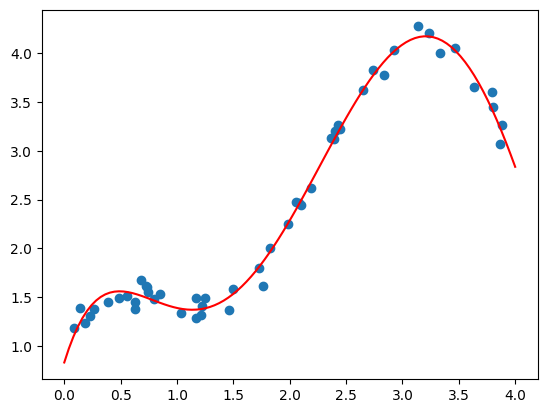

In [8]:
plt.scatter(x, y)
plt.plot(np.linspace(0, 4, 100), y_pred, color='r')

3. Из визуализации ниже видно, что модель слишом плоно прохоит по все точкам выбоки. А средрняя квадратичная ошибка силшком маленькая что говорит о переобучении.

In [9]:
poly_model_overfitting = make_pipeline(PolynomialFeatures(15), LinearRegression())
poly_model_overfitting.fit(x.reshape(-1,1), y)
y_pred = poly_model_overfitting.predict(np.linspace(0, 4, 100).reshape(-1, 1))

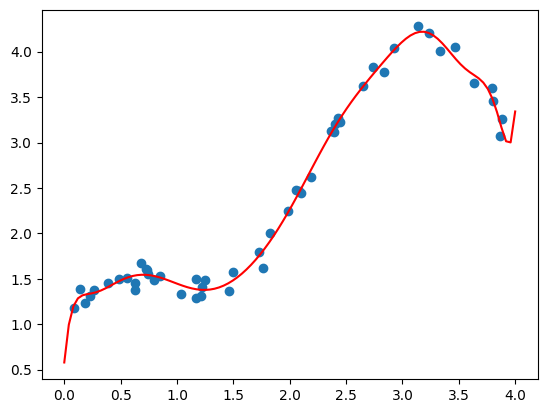

In [10]:
plt.scatter(x, y)
plt.plot(np.linspace(0, 4, 100), y_pred, color='r')

In [11]:
mean_squared_error(poly_model_overfitting.predict(x.reshape(-1,1)), y)

0.006453987144196184

## Задание 2

1. Постройте модель прогноза для данных из задания 1, используя модель регрессии с регуляризацией Ridge.
2. Постройте модель прогноза для данных из задания 1, используя модель регрессии с регуляризацией Lasso.
3. Постройте модель прогноза для данных из задания 1, используя модель регрессии с регуляризацией Elastic Net.
4. Как изменяются коэффициенты w(i) функций регрессоров? Визуализируйте изменения коэффициентов для всех моделей из заданий 1 и 2.

In [27]:
lasso_model = make_pipeline(PolynomialFeatures(10), Lasso(max_iter=6000)) 
ridge_model = make_pipeline(PolynomialFeatures(10), Ridge(max_iter=6000)) 
elastic_model =  make_pipeline(PolynomialFeatures(10), ElasticNet(alpha=0.5, max_iter=6000)) 

In [28]:
x = 4 * rng.rand(50)
y = np.sin(x) + np.cos(2*x) + x + 0.1 * rng.randn(50)

In [29]:
lasso_model.fit(x.reshape(-1,1), y)
ridge_model.fit(x.reshape(-1,1), y)
elastic_model.fit(x.reshape(-1,1), y)

/home/ilya/study/ML/ML-LR/env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.735e+00, tolerance: 5.076e-03
  model = cd_fast.enet_coordinate_descent(
/home/ilya/study/ML/ML-LR/env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.632e+00, tolerance: 5.076e-03
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=10)),
                ('elasticnet', ElasticNet(alpha=0.5, max_iter=6000))])

In [30]:
lasso_coef = lasso_model._final_estimator.coef_
ridge_coef = ridge_model._final_estimator.coef_
elastic_coef = elastic_model._final_estimator.coef_

In [31]:
table = list(zip(lasso_coef, ridge_coef, elastic_coef))
headers = ["Lasso", "Ridge", "ElasticNet"]

In [32]:
table

[(0.0, 0.0, 0.0),
 (0.0, 0.10891280205725859, 0.0),
 (0.0, -0.022203362280336716, 0.0),
 (0.0, -0.06830086757564001, 0.0),
 (0.0, -0.027854760524569387, 0.07339691250620244),
 (0.03493836505916199, 0.046676458178229456, 0.007810413915726516),
 (-0.0003206099918274157, 0.05850604531827954, -0.005048469293198223),
 (-0.002764418658580037, -0.029847704377155348, -0.0009656899067663278),
 (-0.00018217224042039185, -0.0025817997672398655, -4.7417835768780894e-05),
 (2.3376473686869983e-05, 0.0027021595735627333, 1.7704934388275302e-05),
 (1.7363405268360838e-05, -0.00030941849460022183, 9.474039894503458e-06)]

In [33]:
print(tabulate(table, headers, tablefmt="grid"))

+--------------+--------------+--------------+
|        Lasso |        Ridge |   ElasticNet |
+==============+==============+==============+
|  0           |  0           |  0           |
+--------------+--------------+--------------+
|  0           |  0.108913    |  0           |
+--------------+--------------+--------------+
|  0           | -0.0222034   |  0           |
+--------------+--------------+--------------+
|  0           | -0.0683009   |  0           |
+--------------+--------------+--------------+
|  0           | -0.0278548   |  0.0733969   |
+--------------+--------------+--------------+
|  0.0349384   |  0.0466765   |  0.00781041  |
+--------------+--------------+--------------+
| -0.00032061  |  0.058506    | -0.00504847  |
+--------------+--------------+--------------+
| -0.00276442  | -0.0298477   | -0.00096569  |
+--------------+--------------+--------------+
| -0.000182172 | -0.0025818   | -4.74178e-05 |
+--------------+--------------+--------------+
|  2.33765e-0

In [34]:
table = [(mean_squared_error(lasso_model.predict(x.reshape(-1, 1)), y), mean_squared_error(ridge_model.predict(x.reshape(-1, 1)), y), mean_squared_error(elastic_model.predict(x.reshape(-1, 1)), y))]
headers = ["Lasso", "Ridge", "ElasticNet"]

In [35]:
table

[(0.036438125118690774, 0.016634286988052624, 0.02154124512371991)]

In [36]:
print("+-----------+-----------+--------------+")
print("|                MSE                   |")
print(tabulate(table, headers, tablefmt="grid"))

+-----------+-----------+--------------+
|                MSE                   |
+-----------+-----------+--------------+
|     Lasso |     Ridge |   ElasticNet |
+===========+===========+==============+
| 0.0364381 | 0.0166343 |    0.0215412 |
+-----------+-----------+--------------+


## Задание 3.

Используя регуляризацию попытайтесь улучшить модель прогноза велотрафика из ЛР1.

In [37]:
gdd.download_file_from_google_drive(file_id='1giK9E6k8ctuuAUI12FfyDSKY0pm7o3vS',
                                    dest_path='./data/BicycleWeather.csv')

gdd.download_file_from_google_drive(file_id='1x2ewDiIPJT9dmRJ32QJ1lBF1_X4fomyh',
                                    dest_path='./data/gas.csv')

gdd.download_file_from_google_drive(file_id='1y4oQ_xFD_xjReGoeQbMkz5zbPrViBgma',
                                    dest_path='./data/fremont-bridge.csv')

In [38]:
fremont_bridge_df = pd.read_csv("./data/fremont-bridge.csv", parse_dates=['Date'])
bicycle_weather_df = pd.read_csv("./data/BicycleWeather.csv")

In [39]:
fremont_bridge_df = fremont_bridge_df.groupby(fremont_bridge_df['Date'].dt.strftime('%Y%m%d')).sum()

/tmp/ipykernel_22869/908975267.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  fremont_bridge_df = fremont_bridge_df.groupby(fremont_bridge_df['Date'].dt.strftime('%Y%m%d')).sum()


In [40]:
fremont_bridge_df['DATE'] = fremont_bridge_df.index.astype('int64')

In [41]:
bicycle_weather_df = bicycle_weather_df.drop(['STATION', 'STATION_NAME'], axis=1)
bicycle_weather_df = bicycle_weather_df.merge(fremont_bridge_df, how='left', on='DATE')

In [42]:
bicycle_weather_df = bicycle_weather_df.replace(-9999, 0)

In [43]:
bicycle_weather_df['TDIF'] = bicycle_weather_df['TMAX'] - bicycle_weather_df['TMIN']
bicycle_weather_df['WT13x01'] = bicycle_weather_df['WT13'] + bicycle_weather_df['WT01']

bicycle_weather_df = bicycle_weather_df.dropna()

In [44]:
bicycle_weather_df["TARGET"] = bicycle_weather_df["West"] + bicycle_weather_df["East"]

In [45]:
bicycle_weather_df

,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,...,WT13,WT16,WT08,WT18,WT03,West,East,TDIF,WT13x01,TARGET
276,20121003,0,0,0,189,78,73,10,20,103,...,0,0,0,0,0,1760.0,1761.0,111,0,3521.0
277,20121004,0,0,0,189,83,65,20,20,94,...,0,0,0,0,0,1708.0,1767.0,106,0,3475.0
278,20121005,0,0,0,217,89,57,360,360,80,...,0,0,0,0,0,1558.0,1590.0,128,0,3148.0
279,20121006,0,0,0,239,78,51,20,20,76,...,0,0,0,0,0,1080.0,926.0,161,0,2006.0
280,20121007,0,0,0,239,78,13,30,10,54,...,0,0,0,0,0,1191.0,951.0,161,0,2142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,20150828,5,0,0,233,156,26,230,240,81,...,0,0,0,0,0,1300.0,1353.0,77,1,2653.0
1336,20150829,325,0,0,222,133,58,210,210,157,...,0,0,0,0,0,365.0,334.0,89,1,699.0
1337,20150830,102,0,0,200,128,47,200,200,89,...,0,0,0,0,0,672.0,541.0,72,1,1213.0
1338,20150831,0,0,0,189,161,58,210,210,112,...,0,0,0,0,0,1310.0,1513.0,28,0,2823.0


In [46]:
feature =['PRCP', 'TMAX', 'TMIN', 'WSF2', 'WT13x01', 'WT16']

In [47]:
X = bicycle_weather_df[feature]
y = bicycle_weather_df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
log_reg = make_pipeline(PolynomialFeatures(degree=2), Ridge(alpha=1))
log_reg.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=1))])

In [49]:
log_reg.score(X_test, y_test)

0.5619271099326122

In [50]:
y_pred = log_reg.predict(X_test)

## Задание 4.

Постройте оптимальную модель для прогноза выплаты по страховке в зависимости от количества страховых кейсов.

https://data.world/anujonthemove/auto-insurance-in-sweden

In [55]:
gdd.download_file_from_google_drive(file_id='13AzC0RRY5NFFiU3FAO1bh9-E3z1_q3x4',
                                    dest_path='./data/auto_insurance_sweden.csv')

In [56]:
df = pd.read_csv('./data/auto_insurance_sweden.csv', header=None)

In [57]:
df

,0,1
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


In [58]:
X = df[0]
y = df[1]

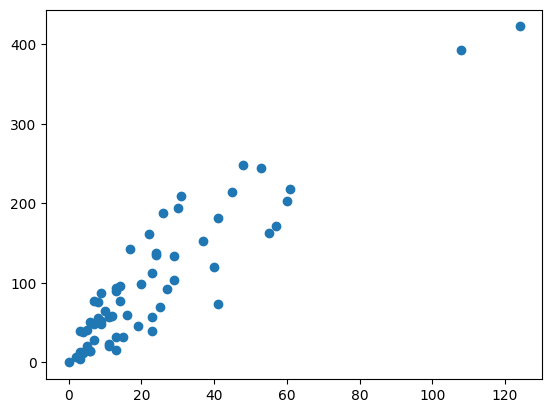

In [59]:
plt.scatter(X, y)

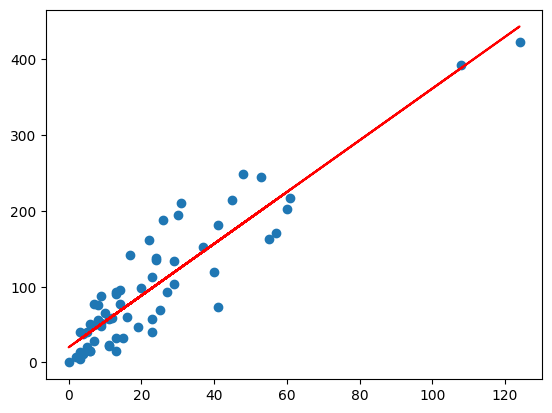

In [60]:
model = Ridge()
model.fit(np.array(X).reshape(-1, 1), y)
y_pred = model.predict(np.array(X).reshape(-1, 1))

plt.scatter(X, y)
plt.plot(X, y_pred, color="red")
plt.show()